Importing all the libraries

In [5]:
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import yfinance as yf
# import tkinter as tk
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

KeyError: 'Rectangle:kwdoc'

Acquiring, cleaning and preprocessing data

In [ ]:
def acquire_and_clean_data(ticker, start_date, end_date):
    """
    Acquires and cleans stock data from Yahoo Finance for a specified ticker symbol and date range
    
    Parameters:
    ticker (str): The stock ticker symbol
    start_date (str): The start date in the format 'YYYY-MM-DD'
    end_date (str): The end date in the format 'YYYY-MM-DD'
    
    Returns:
    pd.DataFrame: Cleaned stock data
    """
    # Download the stock data
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Clean and preprocess the data
    df = df.dropna() # remove missing values
    df = df.drop(columns=['Adj Close']) # remove unnecessary columns
    df = df[df['Volume'] != 0] # remove rows with 0 volume
    df['Returns'] = df['Close'].pct_change() # calculate daily returns
    df = df.dropna() # remove missing values again
    
    return df

# Example usage
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-12-31"
df = acquire_and_clean_data(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


Code for Exploratory Data Analysis

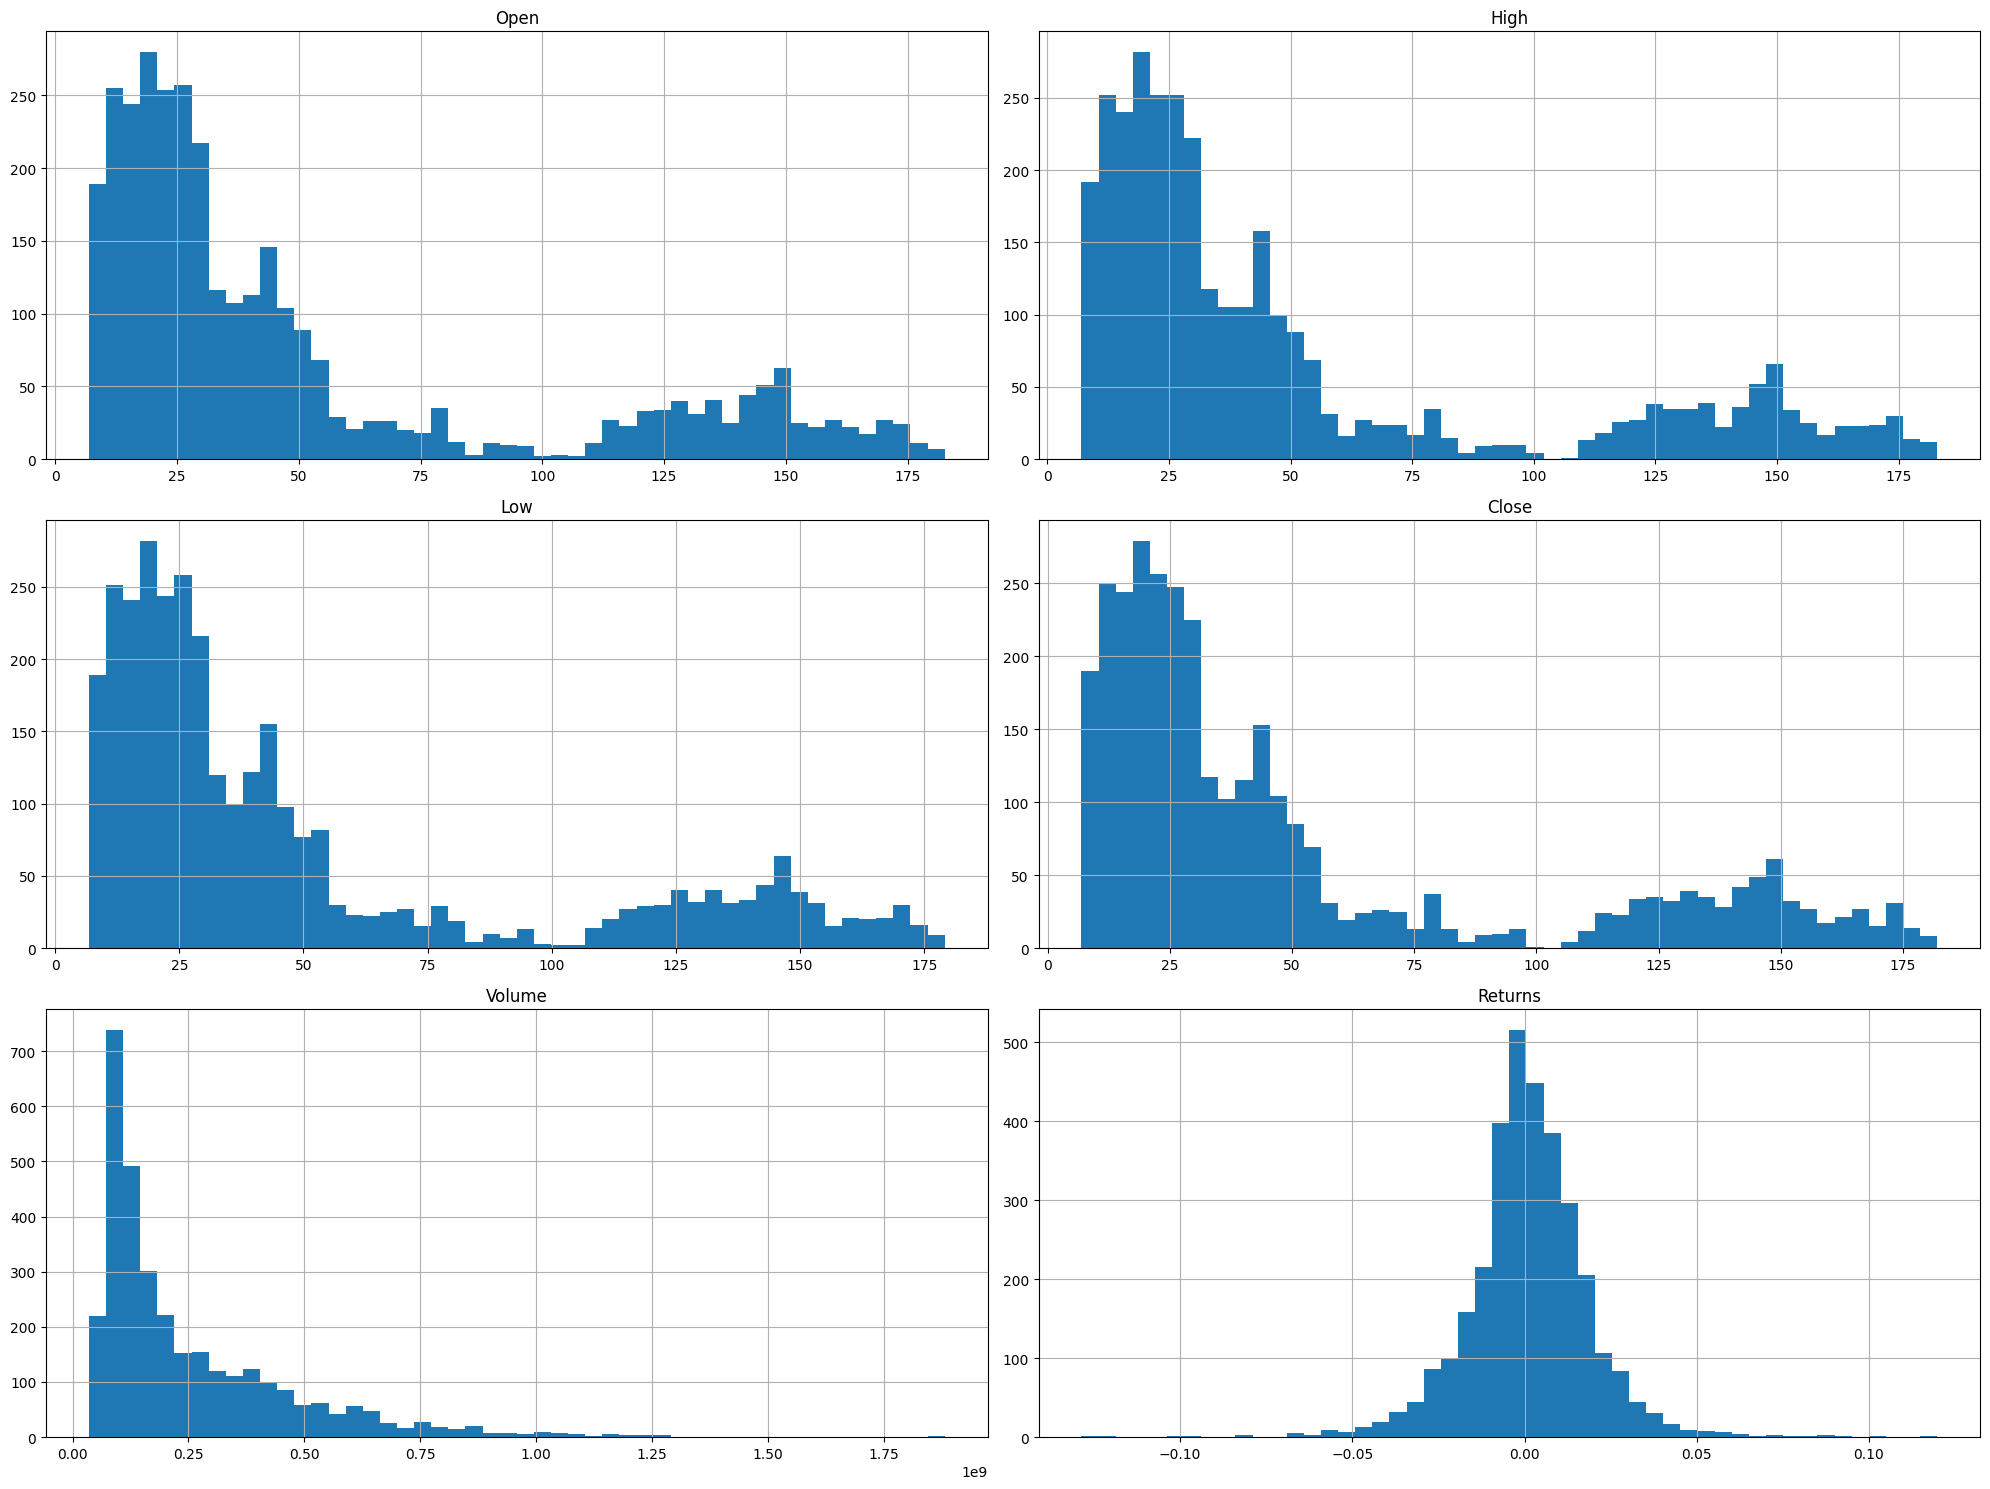

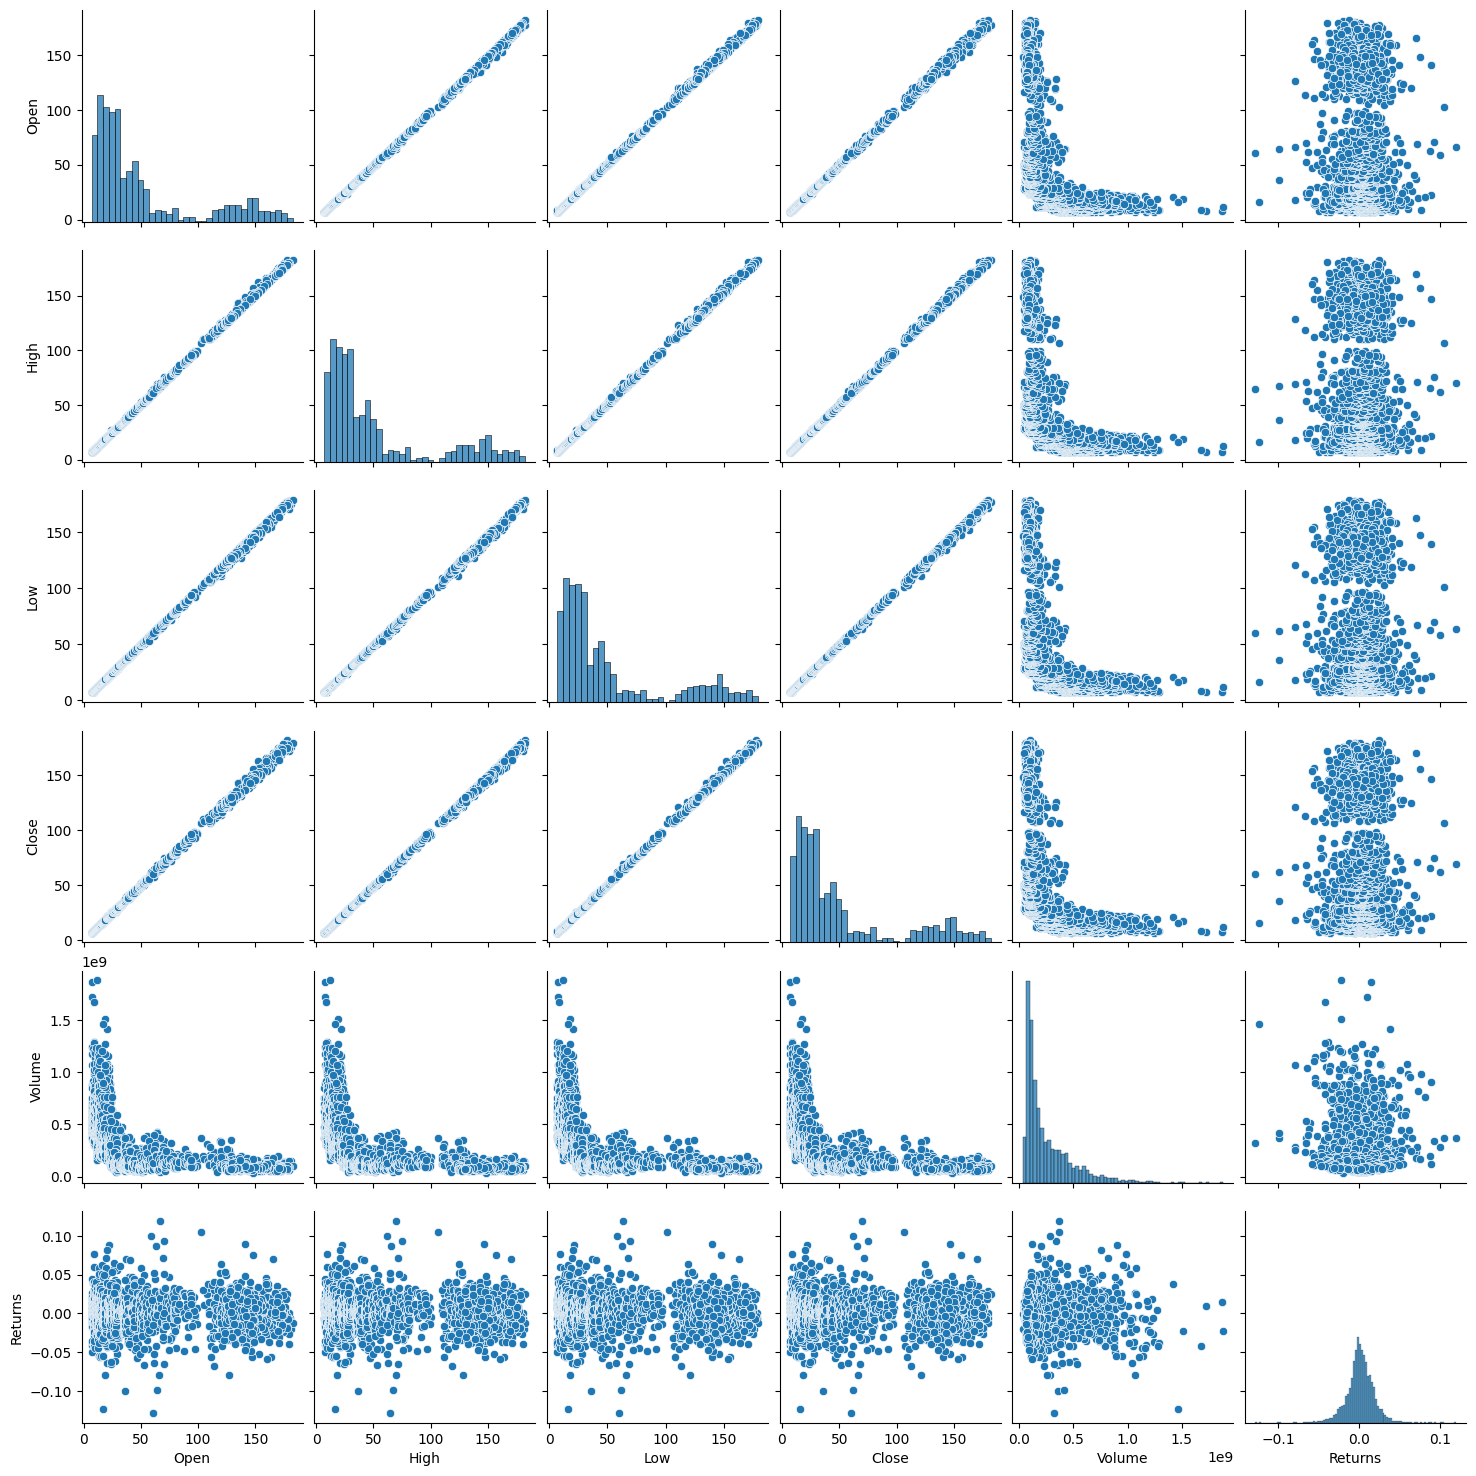

In [ ]:
def plot_data(df, plot_type):
    """
    Plots either histograms or scatter matrix for all columns in a dataframe
    
    Parameters:
    df (pd.DataFrame): The input dataframe
    plot_type (str): Type of plot, either 'histograms' or 'scatter_matrix'
    
    Returns:
    None
    """
    if plot_type == 'histograms':
        # Plot histograms for all columns
        df.hist(bins=50, figsize=(20,15))
        plt.tight_layout()
        plt.show()
    elif plot_type == 'scatter_matrix':
        # Plot a scatter matrix for all columns
        sns.pairplot(df)
        plt.show()
    else:
        raise ValueError("Invalid plot type. Choose either 'histograms' or 'scatter_matrix'.")

# Example usage
plot_data(df, 'histograms')
plot_data(df, 'scatter_matrix')


Code for feature engineering

Split the data into training and testing sets